<a href="https://www.kaggle.com/soutanbasak/prison-break?scriptVersionId=85653154" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# My First Data Science Project

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/little-help/helper.py


## Helicopter Escapes!

We begin by importing some helper functions

In [2]:
# import module we'll need to import our custom module
from shutil import copyfile

# copy our file into the working directory (make sure it has .py suffix)
copyfile(src = "../input/little-help/helper.py", dst = "../working/helper.py")

# import all our functions
from helper import *

## Get the Data

Now, let's get the data from the [List of helicopter prison escapes](https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes) Wikipedia article.

In [3]:
url="https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes"
data=data_from_url(url)

Let's print the first three rows

In [4]:
index=0
for row in data[:3]:
    print(row[0:5])
    index+=1

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro']
['October 31, 1973', 'Mountjoy Jail', 'Ireland', 'Yes', "JB O'Hagan Seamus TwomeyKevin Mallon"]
['May 24, 1978', 'United States Penitentiary, Marion', 'United States', 'No', 'Garrett Brock TrapnellMartin Joseph McNallyJames Kenneth Johnson']


Fetching all the years

In [5]:
for row in data:
    row[0]=fetch_year(row[0])

Creating max & min point

In [6]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

making a list

In [7]:
years = []

for y in range(min_year, max_year + 1):
    years.append(y)

counting yearwise

In [8]:
attempts_per_year=[]
for row in years:
    attempts_per_year.append([row,0])

print(attempts_per_year)

[[1971, 0], [1972, 0], [1973, 0], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 0], [1979, 0], [1980, 0], [1981, 0], [1982, 0], [1983, 0], [1984, 0], [1985, 0], [1986, 0], [1987, 0], [1988, 0], [1989, 0], [1990, 0], [1991, 0], [1992, 0], [1993, 0], [1994, 0], [1995, 0], [1996, 0], [1997, 0], [1998, 0], [1999, 0], [2000, 0], [2001, 0], [2002, 0], [2003, 0], [2004, 0], [2005, 0], [2006, 0], [2007, 0], [2008, 0], [2009, 0], [2010, 0], [2011, 0], [2012, 0], [2013, 0], [2014, 0], [2015, 0], [2016, 0], [2017, 0], [2018, 0], [2019, 0], [2020, 0]]


In [9]:
for row in data:
    for ya in attempts_per_year:
        y=ya[0]
        if row[0] == y:
            ya[1] += 1
print(attempts_per_year)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 1], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


# Answering the questions

## In which year did the most attempts at breaking out of prison with a helicopter occur?

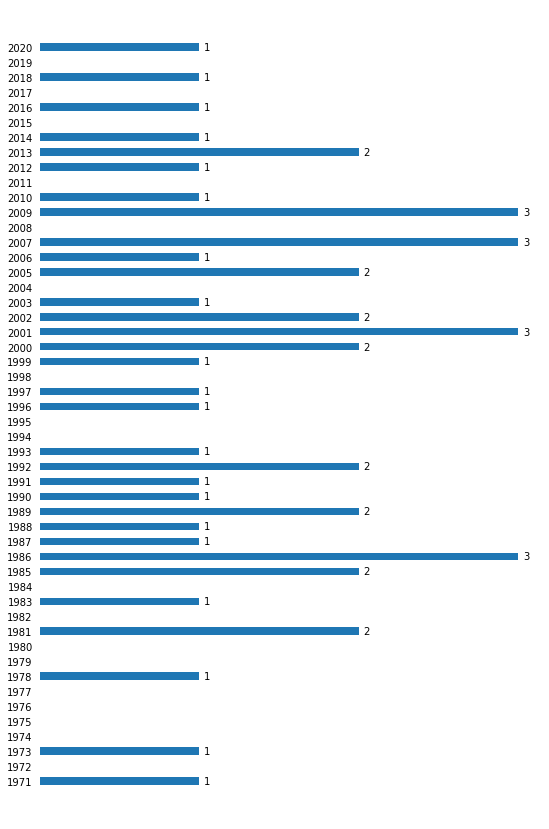

In [10]:
%matplotlib inline
barplot(attempts_per_year)

## In which country did the most attempts at breaking out of prison with a helicopter occur?

In [11]:
countries_frequency = df["Country"].value_counts()

print_pretty_table(countries_frequency)

Country,Number of Occurrences
France,15
United States,8
Canada,4
Greece,4
Belgium,4
Australia,2
Brazil,2
United Kingdom,2
Mexico,1
Ireland,1
